# Homework 5: PCA and Clustering

**Course:** MATH 8710 - Introduction to Machine Learning I  
---

## Overview and Learning Goals

This assignment explores dimensionality reduction through Principal Component Analysis (PCA) and clustering methods including K-means (hard assignment) and Spectral Clustering (graph-based).

**Points:** 100 total (120 with bonus)  
---

## Setup and Imports

In [195]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Standard figure parameters from style guide
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'lines.linewidth': 2,
    'lines.markersize': 8
})

# Color palette following style guide
COLORS = {
    'primary': '#1f77b4',      # Blue - main data/algorithm
    'secondary': '#ff7f0e',    # Orange - comparisons/alternatives  
    'success': '#2ca02c',      # Green - good results/convergence
    'warning': '#d62728',      # Red - errors/problems
    'accent': '#9467bd',       # Purple - highlights
    'neutral': '#7f7f7f'       # Gray - auxiliary information
}

# Set random seeds for reproducibility
np.random.seed(42)

print("Environment setup complete!")

Environment setup complete!


---

# Part I: Principal Component Analysis (30 points)

## Problem 1: PCA on the Wine Quality Dataset

### Dataset Information

**UCI Wine Quality Dataset** (combined red and white wines)
- **Dimensionality:** 11 chemical features
- **Samples:** ~6500 wines
- **Source:** https://archive.ics.uci.edu/ml/datasets/wine+quality

**Features:**
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

---

## 1.1 Data Preparation and PCA Implementation (10 points)

Load and prepare the wine quality datasets, then implement PCA.

In [196]:
# TODO: Load red and white wine datasets
# Load red wine data from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Load white wine data from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

# YOUR CODE HERE
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red = pd.read_csv(red_url, sep = ';')
white = pd.read_csv(white_url, sep = ';')

In [197]:
# TODO: Merge the datasets and add a 'wine_type' column to distinguish red vs white

# YOUR CODE HERE
red['wine_type'] = 'red'
white['wine_type'] = 'white'

wine = pd.concat([red,white], ignore_index = True)
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [198]:
# TODO: Display basic statistics about the combined dataset
# Report: number of red wines, number of white wines, total wines, number of features

# YOUR CODE HERE
print(f"Total number of red wines: {len(wine[wine['wine_type']=='red'])}")
print(f"Total number of white wines: {len(wine[wine['wine_type']=='white'])}")
print(f"Total number of wines: {len(wine)}")
print(f"Total number of features: {len(wine.columns)-1}")

Total number of red wines: 1599
Total number of white wines: 4898
Total number of wines: 6497
Total number of features: 12


In [199]:
# TODO: Standardize the feature data (zero mean, unit variance)
# Extract features (exclude quality score and wine_type if present)

# YOUR CODE HERE

feature_columns = [col for col in wine.columns if col not in ['quality', 'wine_type']]
wine_feature = wine[feature_columns]

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_feature)

wine_scaled = pd.DataFrame(wine_scaled, columns = feature_columns)

print("Feature standardization completed!")

Feature standardization completed!


In [200]:
# TODO: Implement PCA using covariance eigendecomposition
# You may use numpy.linalg.eigh or scipy.linalg.eigh for the eigendecomposition
# Steps:
# 1. Compute the covariance matrix
# 2. Compute eigenvalues and eigenvectors
# 3. Sort by eigenvalues in descending order

# YOUR CODE HERE
covariance_matrix = np.cov(wine_scaled, rowvar = False)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

---

## 1.2 Variance Analysis and Visualization (12 points)

In [201]:
# TODO: Compute the proportion of variance explained by each component

# YOUR CODE HERE
total_variance = np.sum(eigenvalues_sorted)
explained_variance_ratio = eigenvalues_sorted / total_variance

for i, (eigenval, ratio) in enumerate(zip(eigenvalues_sorted, explained_variance_ratio)):
    print(f"Eigenvalue {i+1}: = {eigenval:.3f}, Variance Explained = {ratio:.3f}")

Eigenvalue 1: = 3.030, Variance Explained = 0.275
Eigenvalue 2: = 2.494, Variance Explained = 0.227
Eigenvalue 3: = 1.557, Variance Explained = 0.141
Eigenvalue 4: = 0.971, Variance Explained = 0.088
Eigenvalue 5: = 0.720, Variance Explained = 0.065
Eigenvalue 6: = 0.607, Variance Explained = 0.055
Eigenvalue 7: = 0.523, Variance Explained = 0.048
Eigenvalue 8: = 0.502, Variance Explained = 0.046
Eigenvalue 9: = 0.337, Variance Explained = 0.031
Eigenvalue 10: = 0.228, Variance Explained = 0.021
Eigenvalue 11: = 0.033, Variance Explained = 0.003


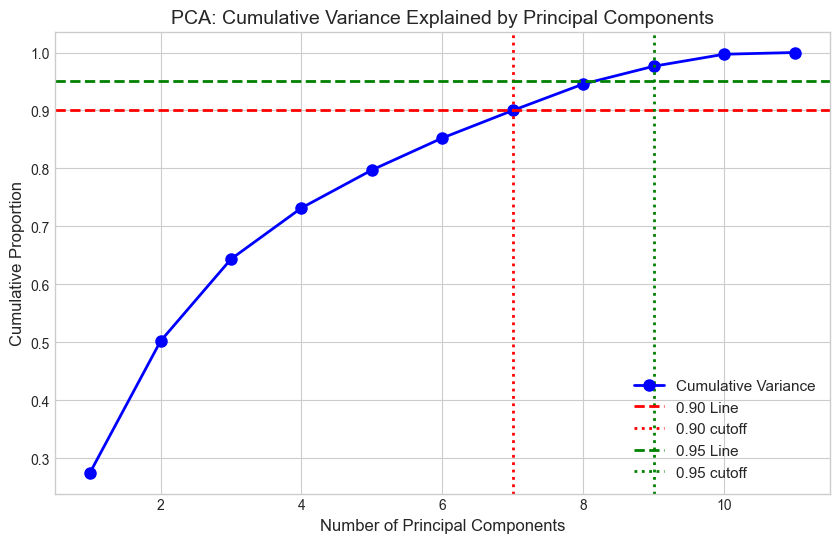

In [202]:
# TODO: Create cumulative variance explained plot
# Include:
# - Horizontal lines at 90% and 95% variance explained
# - Labels showing how many components needed for each threshold
# - Proper axis labels and title

# YOUR CODE HERE
cumulative_variance = np.cumsum(explained_variance_ratio)
    
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    
plt.figure()
components = range(1, len(cumulative_variance) + 1)
plt.plot(components, cumulative_variance, 'b-o', label='Cumulative Variance')

plt.axhline(y=0.90, color='r', linestyle='--', label = '0.90 Line')
plt.axvline(x=n_components_90, color='r', linestyle=':', label = '0.90 cutoff')
plt.axhline(y=0.95, color='g', linestyle='--', label = '0.95 Line')
plt.axvline(x=n_components_95, color='g', linestyle=':', label = '0.95 cutoff')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion')
plt.title('PCA: Cumulative Variance Explained by Principal Components')

plt.legend(loc='lower right')

plt.show()

**How many components are needed?**

<!-- STUDENT ANSWER: Report the number of components needed for 90% and 95% variance -->

In [203]:
# TODO: Project data onto first two principal components

# YOUR CODE HERE
projected_2 = wine_scaled @ eigenvectors_sorted[:,:2]
print(f"Projected onto first two principle components: \n{projected_2}")

Projected onto first two principle components: 
             0         1
0    -3.205996  0.416523
1    -3.039051  1.107462
2    -3.071893  0.878964
3    -1.571262  2.112545
4    -3.205996  0.416523
...        ...       ...
6492 -0.062824 -1.934205
6493  1.866989  0.524431
6494  0.571133 -0.722662
6495  0.090052 -3.545780
6496  0.512576 -2.891040

[6497 rows x 2 columns]


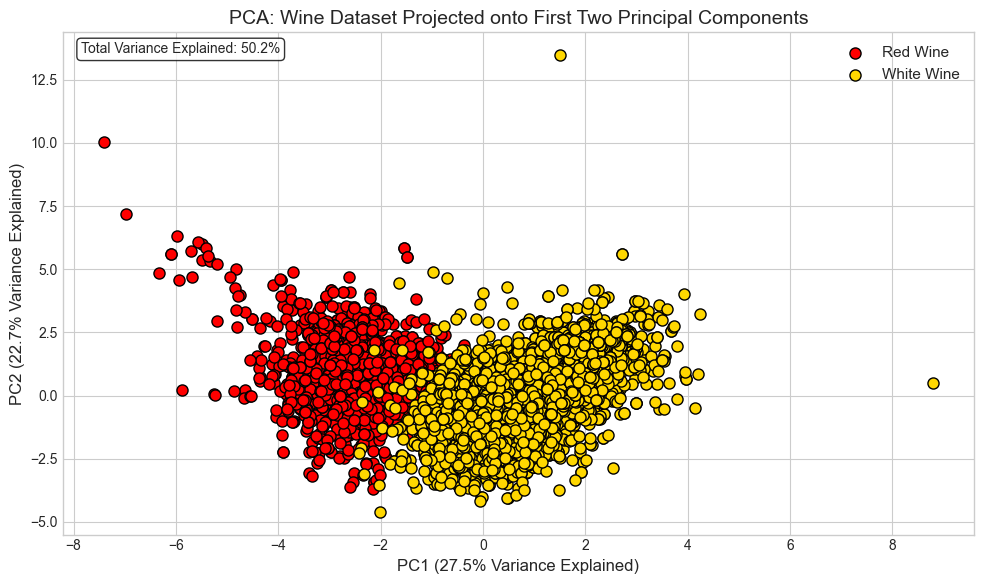

In [204]:
# TODO: Create 2D scatter plot of first two PCs, colored by wine type (red vs white)
# Include:
# - Different colors for red and white wines
# - Proper axis labels (PC1, PC2 with variance explained)
# - Legend
# - Title

# YOUR CODE HERE
variance_pc1 = eigenvalues_sorted[0] / total_variance * 100
variance_pc2 = eigenvalues_sorted[1] / total_variance * 100

plt.figure()

red_mask = projected_2.iloc[:1599]
white_mask = projected_2.iloc[1600:]

plt.scatter(red_mask[0], red_mask[1], c='red', label='Red Wine', edgecolors='black')
plt.scatter(white_mask[0], white_mask[1], c='gold', label='White Wine', edgecolors='black')

plt.xlabel(f'PC1 ({variance_pc1:.1f}% Variance Explained)')
plt.ylabel(f'PC2 ({variance_pc2:.1f}% Variance Explained)')
plt.title('PCA: Wine Dataset Projected onto First Two Principal Components')

plt.legend()

# Add some statistics to the plot
total_variance_2d = variance_pc1 + variance_pc2
plt.text(0.02, 0.98, f'Total Variance Explained: {total_variance_2d:.1f}%', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


**Interpretation:**

<!-- STUDENT ANSWER: One sentence about whether the first two PCs separate red/white wines -->

---

## 1.3 Component Interpretation (8 points)

In [205]:
# TODO: Extract loadings (eigenvectors) for first 3 principal components

# YOUR CODE HERE
projected_3 = wine_scaled @ eigenvectors_sorted[:,:3]
print(f"Projected onto first three principle components: \n{projected_3}")


Projected onto first three principle components: 
             0         1         2
0    -3.205996  0.416523  2.722237
1    -3.039051  1.107462  2.046952
2    -3.071893  0.878964  1.742580
3    -1.571262  2.112545 -2.592917
4    -3.205996  0.416523  2.722237
...        ...       ...       ...
6492 -0.062824 -1.934205 -0.223912
6493  1.866989  0.524431  0.431798
6494  0.571133 -0.722662 -0.091469
6495  0.090052 -3.545780 -0.141195
6496  0.512576 -2.891040 -0.739417

[6497 rows x 3 columns]


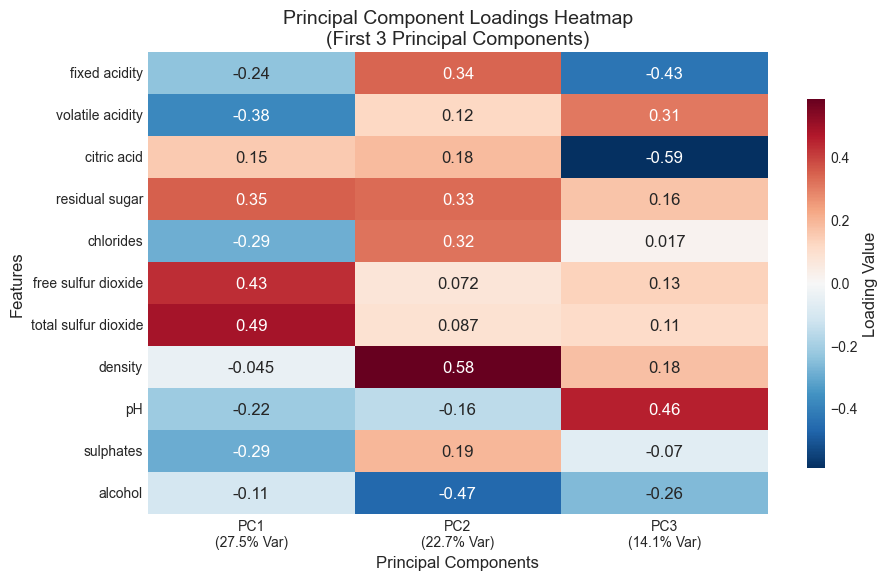

In [206]:
# TODO: Create a loading heatmap for the first 3 PCs
# Include:
# - Feature names on y-axis
# - PC1, PC2, PC3 on x-axis
# - Color bar
# - Annotations showing loading values
# - Proper title

# YOUR CODE HERE
heatmap_df = pd.DataFrame(eigenvectors_sorted[:,:3], index=feature_columns, columns=[f'PC{i+1}' for i in range(3)])

variance_explained = eigenvalues_sorted[:3] / total_variance

plt.figure()

ax = sns.heatmap(heatmap_df, annot=True, cmap='RdBu_r', cbar_kws={'label': 'Loading Value', 'shrink': 0.8})
plt.title('Principal Component Loadings Heatmap\n(First 3 Principal Components)')
ax.set_xticklabels([f'PC{i+1}\n({variance_explained[i]*100:.1f}% Var)' for i in range(3)])
plt.ylabel('Features')
plt.xlabel('Principal Components')
plt.yticks(rotation=0)

plt.show()

**Interpretations:**

**PC1:** Total sulfur dioxide

**PC2:** Density

**PC3:** Citric acid

---

# Part II: K-Means Clustering and Evaluation (30 points)

## Problem 2: Silhouette Score Analysis on MNIST Digits

### Context

When applying clustering algorithms, we often don't know the true number of clusters $K$ in advance. The **silhouette score** is a popular metric for evaluating clustering quality that measures how similar each point is to its own cluster compared to other clusters.

### Silhouette Score Definition

For each data point $i$, the silhouette coefficient is:
$$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$$

where:
- $a_i$ = average distance from point $i$ to other points in the **same cluster** (intra-cluster distance)
- $b_i$ = average distance from point $i$ to points in the **nearest neighboring cluster** (inter-cluster distance)

The silhouette score ranges from -1 to +1:
- **$s_i \approx +1$**: Point is well-matched to its own cluster and far from neighboring clusters (good)
- **$s_i \approx 0$**: Point is on or very close to the decision boundary between clusters
- **$s_i \approx -1$**: Point may have been assigned to the wrong cluster (bad)

The **overall silhouette score** is the mean of all individual silhouette coefficients.

### Dataset

**sklearn digits dataset**
- 1797 images of handwritten digits (0-9)
- Each image is 8×8 pixels (64 features)
- 10 natural classes (true digit labels)

---

## 2.1 Data Preparation (8 points)

In [207]:
# TODO: Load the sklearn digits dataset

# YOUR CODE HERE
digits = load_digits()

In [208]:
# TODO: Display dataset dimensions
# Report: number of samples, number of features, number of classes

# YOUR CODE HERE
print("Dataset Dimensions:")
print(f"Number of samples: {digits.data.shape[0]}")
print(f"Number of features: {digits.data.shape[1]}")
print(f"Number of classes: {len(set(digits.target))}")

Dataset Dimensions:
Number of samples: 1797
Number of features: 64
Number of classes: 10


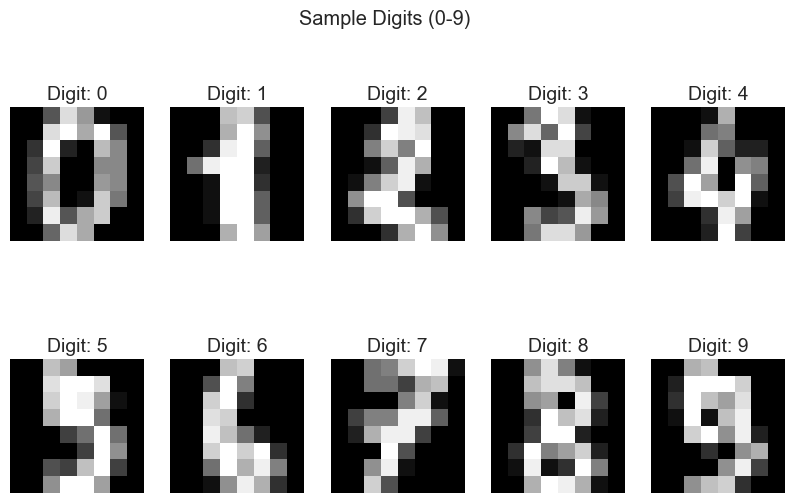

In [209]:
# TODO: Visualize a sample of digits (one from each class, 0-9)
# Create a 2x5 subplot grid showing one example of each digit

# YOUR CODE HERE
fig, axes = plt.subplots(2, 5)
fig.suptitle('Sample Digits (0-9)')

for digit in range(10):
    idx = np.where(digits.target == digit)[0][0]

    row = digit // 5
    col = digit % 5

    axes[row, col].imshow(digits.images[idx], cmap='gray')
    axes[row, col].set_title(f'Digit: {digit}')
    axes[row, col].axis('off')
plt.show()

In [210]:
# TODO: Standardize the features to zero mean and unit variance

# YOUR CODE HERE
digits_scaled = scaler.fit_transform(digits.data)

**Why is standardization important for K-means?**

<!-- STUDENT ANSWER: One sentence explaining the importance of standardization for K-means -->
This ensures all features are on the same scale, prevents features with larger scales from dominating the model, and is especially important for distance-based algorithms and gradient descent

---

## 2.2 K-Means Clustering Analysis (22 points)

In [211]:
# TODO: Apply K-means clustering for K = 2, 3, ..., 64
# For each K, compute:
# - Silhouette score
# Store results for plotting

# YOUR CODE HERE
k_values = []
silhouette_scores = []

for k in range(2, 65):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(digits_scaled)

    silhouette_avg = silhouette_score(digits_scaled, cluster_labels)

    k_values.append(k)
    silhouette_scores.append(silhouette_avg)

k_values = np.array(k_values)
silhouette_scores = np.array(silhouette_scores)

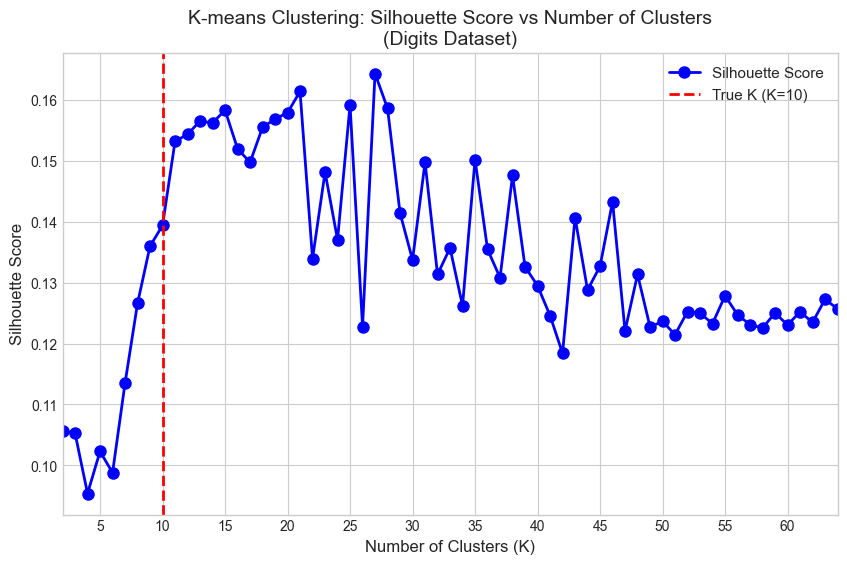

In [212]:
# TODO: Create silhouette plot (Silhouette score vs K)
# Include:
# - Vertical line at K=10 (true number of digit classes)
# - Proper axis labels and title
# - Grid

# YOUR CODE HERE
plt.figure()
plt.plot(k_values, silhouette_scores, 'bo-', label='Silhouette Score')
plt.axvline(x=10, color='red', linestyle='--', label='True K (K=10)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Silhouette Score vs Number of Clusters\n(Digits Dataset)')
plt.grid(True)
plt.legend()

plt.xticks(np.arange(0, 65, 5))
plt.xlim(2, 64)

plt.show()

**Interpretations:**

<!-- STUDENT ANSWER: At what K is the silhouette score maximized? -->
Based on the silhouette plot, the maximum silhouette score occurs at K = 27.
The optimal K found by silhouette score is quite different from the true number of classes. K-means is an unsupervised clustering algorithm that groups data based on similarity in the feature space, not based on the true class labels. The algorithm has no knowledge of the actual digit classes.
<!-- STUDENT ANSWER: Is this the same as the true number of classes (K=10)? Why might they differ? -->

---

# Part III: Spectral Clustering (40 points)

## Problem 3: Graph Laplacian and Connectivity

### Context

You are provided with a graph of 8 nodes arranged in two clusters. A dashed edge between the two clusters may or may not be included in different parts of this problem. Your goal is to understand how the Laplacian's eigenvalues and eigenvectors relate to graph connectivity and cluster structure.

### Graph Structure

The graph consists of:
- **Cluster 1:** Nodes 0, 1, 2, 3 (fully connected with weight 1.0)
- **Cluster 2:** Nodes 4, 5, 6, 7 (fully connected with weight 1.0)
- **Dashed edge:** Between node 3 and node 4 (weight varies)

---

In [213]:
# Provided: Helper function to create the graph adjacency matrix
def create_graph_adjacency(include_bridge=True, bridge_weight=0.1):
    """
    Create adjacency matrix for 8-node graph with two clusters.
    
    Args:
        include_bridge: Whether to include the edge connecting the two clusters
        bridge_weight: Weight of the bridge edge (if included)
    
    Returns:
        W: Affinity matrix (symmetric)
    """
    W = np.zeros((8, 8))
    
    # Cluster 1: nodes 0, 1, 2, 3 (fully connected)
    for i in range(4):
        for j in range(4):
            if i != j:
                W[i, j] = 1.0
    
    # Cluster 2: nodes 4, 5, 6, 7 (fully connected)
    for i in range(4, 8):
        for j in range(4, 8):
            if i != j:
                W[i, j] = 1.0
    
    # Bridge edge between clusters (node 3 to node 4)
    if include_bridge:
        W[3, 4] = bridge_weight
        W[4, 3] = bridge_weight
    
    return W

# Provided: Helper function to visualize the graph
def visualize_graph(W, node_colors=None, node_markers=None, title="Graph"):
    """
    Visualize the 8-node graph.
    
    Args:
        W: Affinity matrix
        node_colors: Array of colors for each node (optional)
        node_markers: Array of marker shapes for each node (optional)
        title: Plot title
    """
    # Node positions (arranged in two clusters)
    pos = np.array([
        [0, 2], [0, 1], [0, 0], [1, 1],  # Cluster 1
        [3, 1], [4, 2], [4, 1], [4, 0]   # Cluster 2
    ])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Draw edges
    for i in range(8):
        for j in range(i+1, 8):
            if W[i, j] > 0:
                linestyle = '--' if (i == 3 and j == 4) else '-'
                linewidth = 3 if W[i, j] >= 1.0 else 1
                alpha = 0.3 if linestyle == '--' else 0.6
                ax.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 
                       'k-', linestyle=linestyle, linewidth=linewidth, alpha=alpha)
    
    # Draw nodes
    if node_colors is None:
        node_colors = ['lightblue'] * 8
    if node_markers is None:
        node_markers = ['o'] * 8
    
    # Group nodes by marker type for legend
    unique_markers = list(set(node_markers))
    for marker in unique_markers:
        indices = [i for i, m in enumerate(node_markers) if m == marker]
        ax.scatter(pos[indices, 0], pos[indices, 1], 
                  c=[node_colors[i] for i in indices],
                  marker=marker, s=500, edgecolors='black', linewidth=2, 
                  cmap='coolwarm', vmin=-1, vmax=1, zorder=10)
    
    # Add node labels
    for i, (x, y) in enumerate(pos):
        ax.text(x, y, str(i), fontsize=14, fontweight='bold',
               ha='center', va='center', zorder=11)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 2.5)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

print("Helper functions loaded!")

Helper functions loaded!


---

## 3.1 Compute the Graph Laplacian (12 points)

In [214]:
# TODO: Create the affinity matrix W with bridge edge included (weight = 0.1)

# YOUR CODE HERE
W = create_graph_adjacency(include_bridge=True, bridge_weight=0.1)

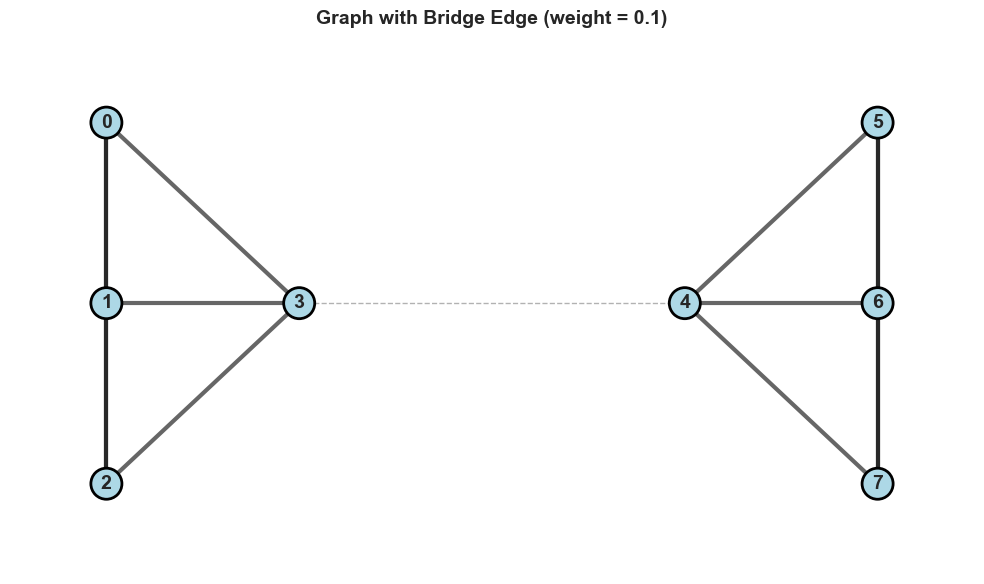

In [215]:
# Visualize the graph
visualize_graph(W, title="Graph with Bridge Edge (weight = 0.1)")

In [216]:
# TODO: Compute the degree matrix D

# YOUR CODE HERE
D = np.diag(np.sum(W, axis=1))

In [217]:
# TODO: Compute the Laplacian matrix L = D - W

# YOUR CODE HERE
L = D - W

In [218]:
# TODO: Display all three matrices explicitly (W, D, L)

# YOUR CODE HERE
print("Affinity Matrix W:")
print(W)
print("\nDegree Matrix D:")
print(D)
print("\nLaplacian Matrix L = D - W:")
print(L)

Affinity Matrix W:
[[0.  1.  1.  1.  0.  0.  0.  0. ]
 [1.  0.  1.  1.  0.  0.  0.  0. ]
 [1.  1.  0.  1.  0.  0.  0.  0. ]
 [1.  1.  1.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.1 0.  1.  1.  1. ]
 [0.  0.  0.  0.  1.  0.  1.  1. ]
 [0.  0.  0.  0.  1.  1.  0.  1. ]
 [0.  0.  0.  0.  1.  1.  1.  0. ]]

Degree Matrix D:
[[3.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  3.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  3.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  3.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  3.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  3.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  3.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  3. ]]

Laplacian Matrix L = D - W:
[[ 3.  -1.  -1.  -1.   0.   0.   0.   0. ]
 [-1.   3.  -1.  -1.   0.   0.   0.   0. ]
 [-1.  -1.   3.  -1.   0.   0.   0.   0. ]
 [-1.  -1.  -1.   3.1 -0.1  0.   0.   0. ]
 [ 0.   0.   0.  -0.1  3.1 -1.  -1.  -1. ]
 [ 0.   0.   0.   0.  -1.   3.  -1.  -1. ]
 [ 0.   0.   0.   0.  -1.  -1.   3.  -1. ]
 [ 0.   0.   0.   0.  -1.  -1.  -1.   3. ]]


---

## 3.2 Perfect Separation Case (12 points)

In [219]:
# TODO: Create affinity matrix with bridge edge removed (weight = 0)

# YOUR CODE HERE
W_disconnected = create_graph_adjacency(include_bridge=True, bridge_weight=0)

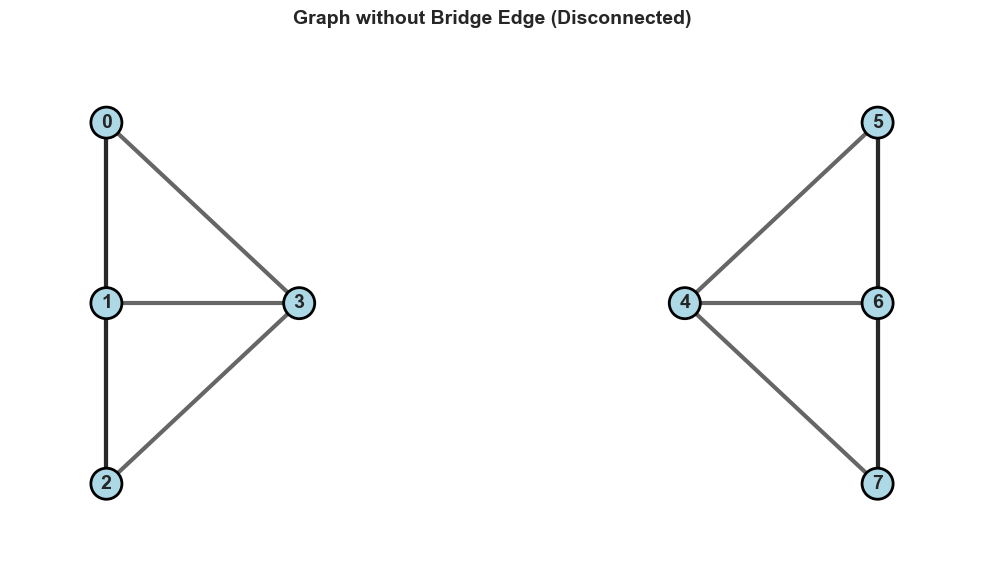

In [220]:
# Visualize the disconnected graph
visualize_graph(W_disconnected, title="Graph without Bridge Edge (Disconnected)")

In [221]:
# TODO: Compute Laplacian for disconnected graph

# YOUR CODE HERE
D_disconnected = np.diag(np.sum(W_disconnected, axis=1))
L_disconnected = D_disconnected - W_disconnected

In [222]:
# TODO: Compute eigenvalues of the disconnected Laplacian

# YOUR CODE HERE
eigvals, eigvecs = np.linalg.eigh(L_disconnected)

In [223]:
# TODO: Report the two smallest eigenvalues

# YOUR CODE HERE
indices = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[indices]
print(f"Smallest eigenvalues are {eigvals_sorted[-1]}, and {eigvals_sorted[-2]}.")

Smallest eigenvalues are -2.2892256858537113e-29, and -2.2892256858537113e-29.


**Interpretation:**

The Laplacian matrix still "sees" the structural connection between nodes 3 and 4, even though the weight is zero. This could also be a rounding error in the calculation.

---

## 3.3 Eigenanalysis with inter-cluster Connection (16 points)

In [224]:
# TODO: Return to the connected graph (bridge edge weight = 1)
# Recompute L with a bridge weight of 1.0

# YOUR CODE HERE
W_connected = create_graph_adjacency(include_bridge=True, bridge_weight=1)
D_connected = np.diag(np.sum(W_connected, axis=1))
L_connected = D_connected - W_connected

In [225]:
# TODO: Compute all eigenvalues and eigenvectors of L

# YOUR CODE HERE
eigvals_connected, eigvecs_connected = np.linalg.eigh(L_connected)

In [226]:
# TODO: Display all eigenvalues

# YOUR CODE HERE
for i, eigval in enumerate(eigvals_connected):
    print(f"Eigenvalue {i+1}: {eigval}")

Eigenvalue 1: -4.3021142204224816e-16
Eigenvalue 2: 0.35424868893540884
Eigenvalue 3: 4.0
Eigenvalue 4: 4.0
Eigenvalue 5: 4.0
Eigenvalue 6: 4.0
Eigenvalue 7: 4.0000000000000036
Eigenvalue 8: 5.645751311064591


In [227]:
# TODO: Verify that the smallest eigenvalue λ₁ ≈ 0

# YOUR CODE HERE


$\lambda_1\approx \varepsilon_{machine}$

In [228]:
# TODO: Identify and report the spectral gap (λ₂)

# YOUR CODE HERE


$\lambda_2 = 0.35424868893540884$

In [229]:
# TODO: Extract the Fiedler vector (v₂)

# YOUR CODE HERE
print(f"The Fiedler vector is: \n{eigvecs_connected[:,1]}")

The Fiedler vector is: 
[ 0.38252766  0.38252766  0.38252766  0.24701774 -0.24701774 -0.38252766
 -0.38252766 -0.38252766]


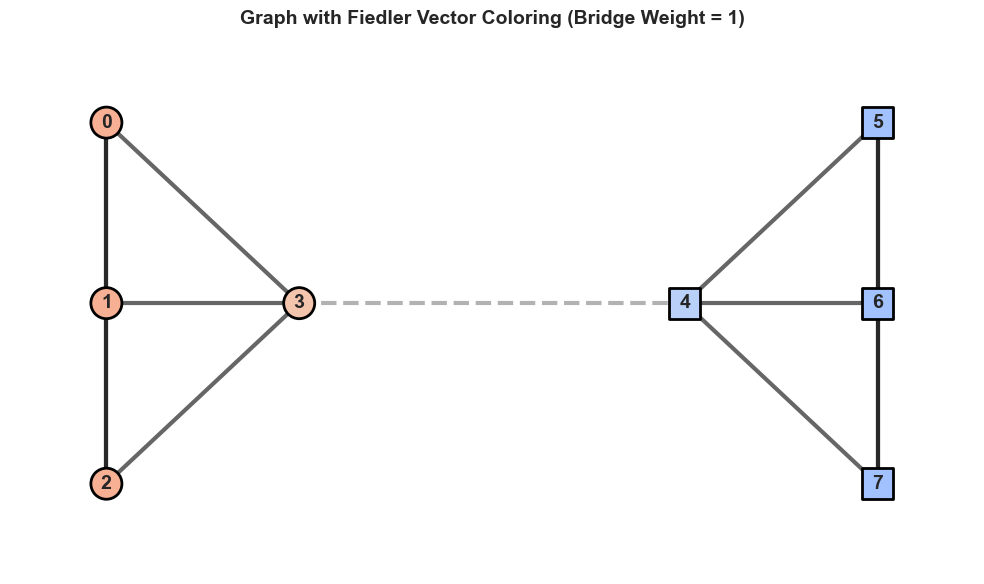

In [230]:
# TODO: Visualize the graph with nodes colored by Fiedler vector values
# Use different marker shapes for the two true clusters:
# - Circle (o) for Cluster 1 (nodes 0, 1, 2, 3)
# - Square (s) for Cluster 2 (nodes 4, 5, 6, 7)

# YOUR CODE HERE
# TODO: Visualize the graph with nodes colored by Fiedler vector values
# Use different marker shapes for the two true clusters:
# - Circle (o) for Cluster 1 (nodes 0, 1, 2, 3)
# - Square (s) for Cluster 2 (nodes 4, 5, 6, 7)

# YOUR CODE HERE
node_colors = eigvecs_connected[:,1]
node_markers = ['o', 'o', 'o', 'o', 's', 's', 's', 's']
visualize_graph(W_connected, node_colors=node_colors, node_markers=node_markers, title="Graph with Fiedler Vector Coloring (Bridge Weight = 1)")

**Interpretation:**

<!-- STUDENT ANSWER: How does the Fiedler vector relate to the cluster structure? -->
The values of the Fiedler vector are related to which parts of the clusters are connected. As shown, each cluster is a different color. The bridge spot is slightly lighter as those Fiedler vector numbers are slightly closer to zero.

---

# Bonus Problem: PCA Reconstruction Error Theory (20 points)

## Theoretical Derivation

Derive the **reconstruction error formula** for PCA and show that choosing principal components minimizes this error.

### Setup

Given:
- Centered data $\tilde{\mathbf{x}}_i = \mathbf{x}_i - \bar{\mathbf{x}}$ for $i=1,\ldots,n$
- Covariance matrix $\mathbf{C} = \frac{1}{n}\sum_{i=1}^n \tilde{\mathbf{x}}_i\tilde{\mathbf{x}}_i^T$ with eigendecomposition $\mathbf{C} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^T$
- Eigenvalues $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d \geq 0$ with corresponding orthonormal eigenvectors
- Principal components matrix $\mathbf{W}_k = [\mathbf{w}_1, \ldots, \mathbf{w}_k]$ (first $k$ eigenvectors)

The PCA reconstruction projects onto a $k$-dimensional subspace then reconstructs in the original space:
$$\hat{\tilde{\mathbf{x}}}_i = \mathbf{W}_k \mathbf{W}_k^T \tilde{\mathbf{x}}_i$$

### Tasks

1. **Derive** the mean squared reconstruction error:
   $$\text{MSE} = \frac{1}{n}\sum_{i=1}^n \|\tilde{\mathbf{x}}_i - \mathbf{W}_k \mathbf{W}_k^T \tilde{\mathbf{x}}_i\|^2$$

2. **Show** that this equals the sum of discarded eigenvalues:
   $$\text{MSE} = \sum_{j=k+1}^d \lambda_j$$
   
3. **Prove** that the top $k$ eigenvectors minimize reconstruction error among all $k$-dimensional orthonormal bases.

4. **Explain** the intuition in 1-2 sentences: Why do discarded principal components contribute exactly their eigenvalues to reconstruction error?

---

## Derivation

<!-- STUDENT ANSWER: 
Write your complete derivation here. Show all steps clearly.

Part 1: Derivation of MSE formula (6 points)

Part 2: Expressing MSE in terms of eigenvalues (8 points)

Part 3: Proof that top-k eigenvectors minimize error (4 points)

Part 4: Intuition (2 points)

-->
Part 1:$\newline$
The reconstruction in the original space after projecting onto the $k$-dimensional subspace is $\hat{\~x_i}=W_k W_k^T \~x_i$. Thus to find the least square solution, we need to look at the mean of the orthogonal projection. It follows $MSE = \frac{1}{n}\sum_{i=1}^n||(I-W_k W_k^T) \~x_i||^2$

Part 2:$\newline$
Let $W_\perp=[v_{k+1},\cdots,v_d]$ or the last $d-k$ eigenvectors. Let $\Lambda_\perp$ be the associated eigenvalues. Thus we can write $MSE = \frac{1}{n}\sum_{i=1}^n||W_\perp W_\perp^T \~x_i||^2=\frac{1}{n}\sum_{i=1}^n \~x_i^T W_\perp W_\perp^T \~x_i$ as $W_\perp W_\perp^T = I-W_k W_k^T$.$\newline$
Note $a^T Ba=tr(a^T Ba)=tr(Baa^T)$. Thus $MSE = tr(W_\perp W_\perp^T \frac{1}{n}\sum_{i=1}^n \~x_i \~x_i^T)=tr(W_\perp W_\perp^T V\Lambda V^T)$.$\newline$
We know that the eigenvectors are orthonormal and $W_\perp$ is a subset of V, it follows $MSE = tr(W_\perp W_\perp^T V\Lambda V^T) = tr(W_\perp \Lambda_\perp W_\perp^T)=tr(W_\perp W_\perp^T \Lambda_\perp)= \sum_{i=k+1}^n \lambda_i$.

Part 3:$\newline$
We want to choose an orthonormal basis to minimize reconstruction error among all $k$-dimensional orthonormal bases. We know the error is $tr(C)-tr(U_k^T CU_k)$. Thus we want to find the $U_k$ that maximizes the second term. We know from Rayleigh-Ritz theory that the maximum of $tr(U_k^T CU_k)$, when restricting $U_k$ to be unitary, happens when $U_k=V_k$. Thus $\min [tr(C)-tr(U_k^T CU_k) ]= tr(C)-tr(V_k^T CV_k) = \sum_{i=1}^d \lambda_i - \sum_{i=1}^k \lambda_i = \sum_{i=k+1}^d \lambda_i$.

Part 4:$\newline$
If we discard the data along an eigenvector, all variance is also lost along that direction. The amount lost is the eigenvalue.